# Kuzushiji-MNIST Classification



<p align="center">
  <img src="https://raw.githubusercontent.com/rois-codh/kmnist/master/images/kmnist_examples.png">
</p>

<p align="center">
    The 10 classes of Kuzushiji-MNIST, with the first column showing each character's modern hiragana counterpart.
</p>

## About Kuzushiji Dataset
The Kuzushiji-MNIST dataset which focuses on Kuzushiji(cursive Japanese) is a classification problem similar to the MNIST dataset. It contains images of the first ten entries from the main Japanese hiragana character groups.

## Image Specifications

- Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total.
- The images are storred in numpy arrays of 60,000 x 28 x 28 and 10,000 x 28 x 28, respectively. 
- The labels are also stored in two numpy arrays, one for train and another for the test set.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import time # benchmarking and timing

# plotting
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.manifold import TSNE # dimensionality reduction

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['kuzushiji', 'osaka-font']


## Exploratory Data Analysis

### Loading the dataset
The npz files are stored as a dictionary and the key can be accesed to retreive the numpy array by using 'arr_0' as mentioned in the source dataset repository: https://github.com/rois-codh/kmnist

>Which format do I download?

>If you're looking for a drop-in replacement for the MNIST or Fashion-MNIST dataset (for tools that currently work with these datasets), download the data in MNIST format.
>Otherwise, it's recommended to download in NumPy format, which can be loaded into an array as easy as:
arr = np.load(filename)['arr_0']

In [2]:
train_images = np.load('../input/kuzushiji/kmnist-train-imgs.npz')['arr_0']
test_images = np.load('../input/kuzushiji/kmnist-test-imgs.npz')['arr_0']
train_labels = np.load('../input/kuzushiji/kmnist-train-labels.npz')['arr_0']
test_labels = np.load('../input/kuzushiji/kmnist-test-labels.npz')['arr_0']

In [3]:
char_df = pd.read_csv('../input/kuzushiji/kmnist_classmap.csv', encoding = 'utf-8')

In [4]:
char_df.T

,0,1,2,3,4,5,6,7,8,9
index,0,1,2,3,4,5,6,7,8,9
codepoint,U+304A,U+304D,U+3059,U+3064,U+306A,U+306F,U+307E,U+3084,U+308C,U+3092
char,お,き,す,つ,な,は,ま,や,れ,を


### Visualizing the character images

In [5]:
from matplotlib.font_manager import FontProperties
from matplotlib import rcParams

# フォントパスを指定 .ttf 形式でないと駄目な模様, 関連：https://github.com/matplotlib/matplotlib/pull/3912
jpfont = FontProperties(fname='../input/osaka-font/Osaka.ttf', size=16)

# get_name() で 'Osaka' が返ってきています。メソッドの代わりに = 'Osaka' としてもOK
rcParams['font.family'] = jpfont.get_name()

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Osaka'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


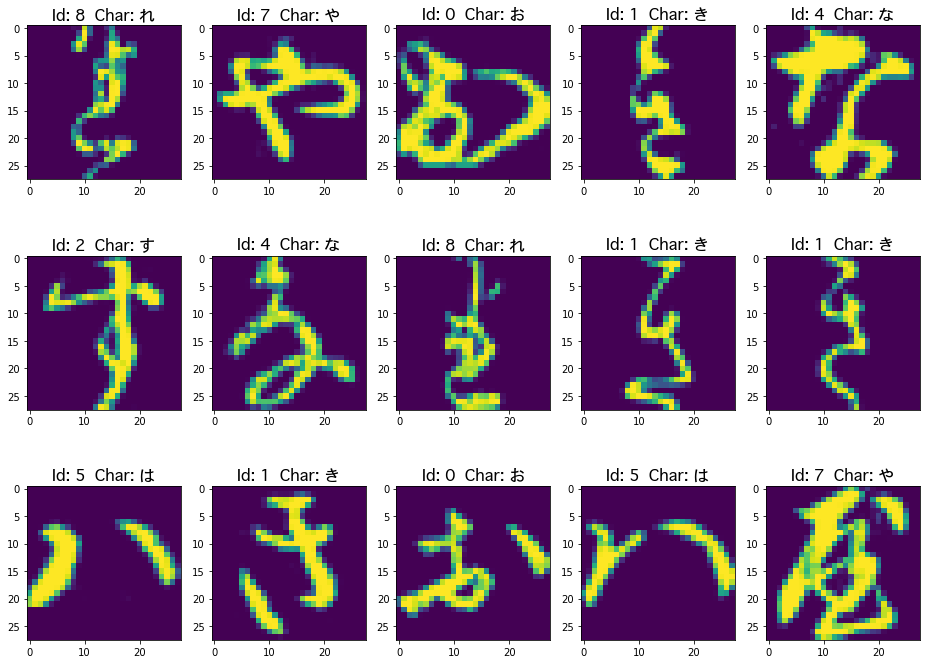

In [6]:
plt.figure(figsize=(16, 12))
for i in range(15):  
    plt.subplot(3, 5, i+1).set_title('Id: {}  Char: {}'.format(train_labels[i], char_df['char'][train_labels[i]]), FontProperties=jpfont)
    plt.imshow(train_images[i])
    plt.grid(False)
plt.show()

Since the character map is not as familiar to us like the numbers(0-9) in MNIST we can see the character variation of the same id's of image as follows

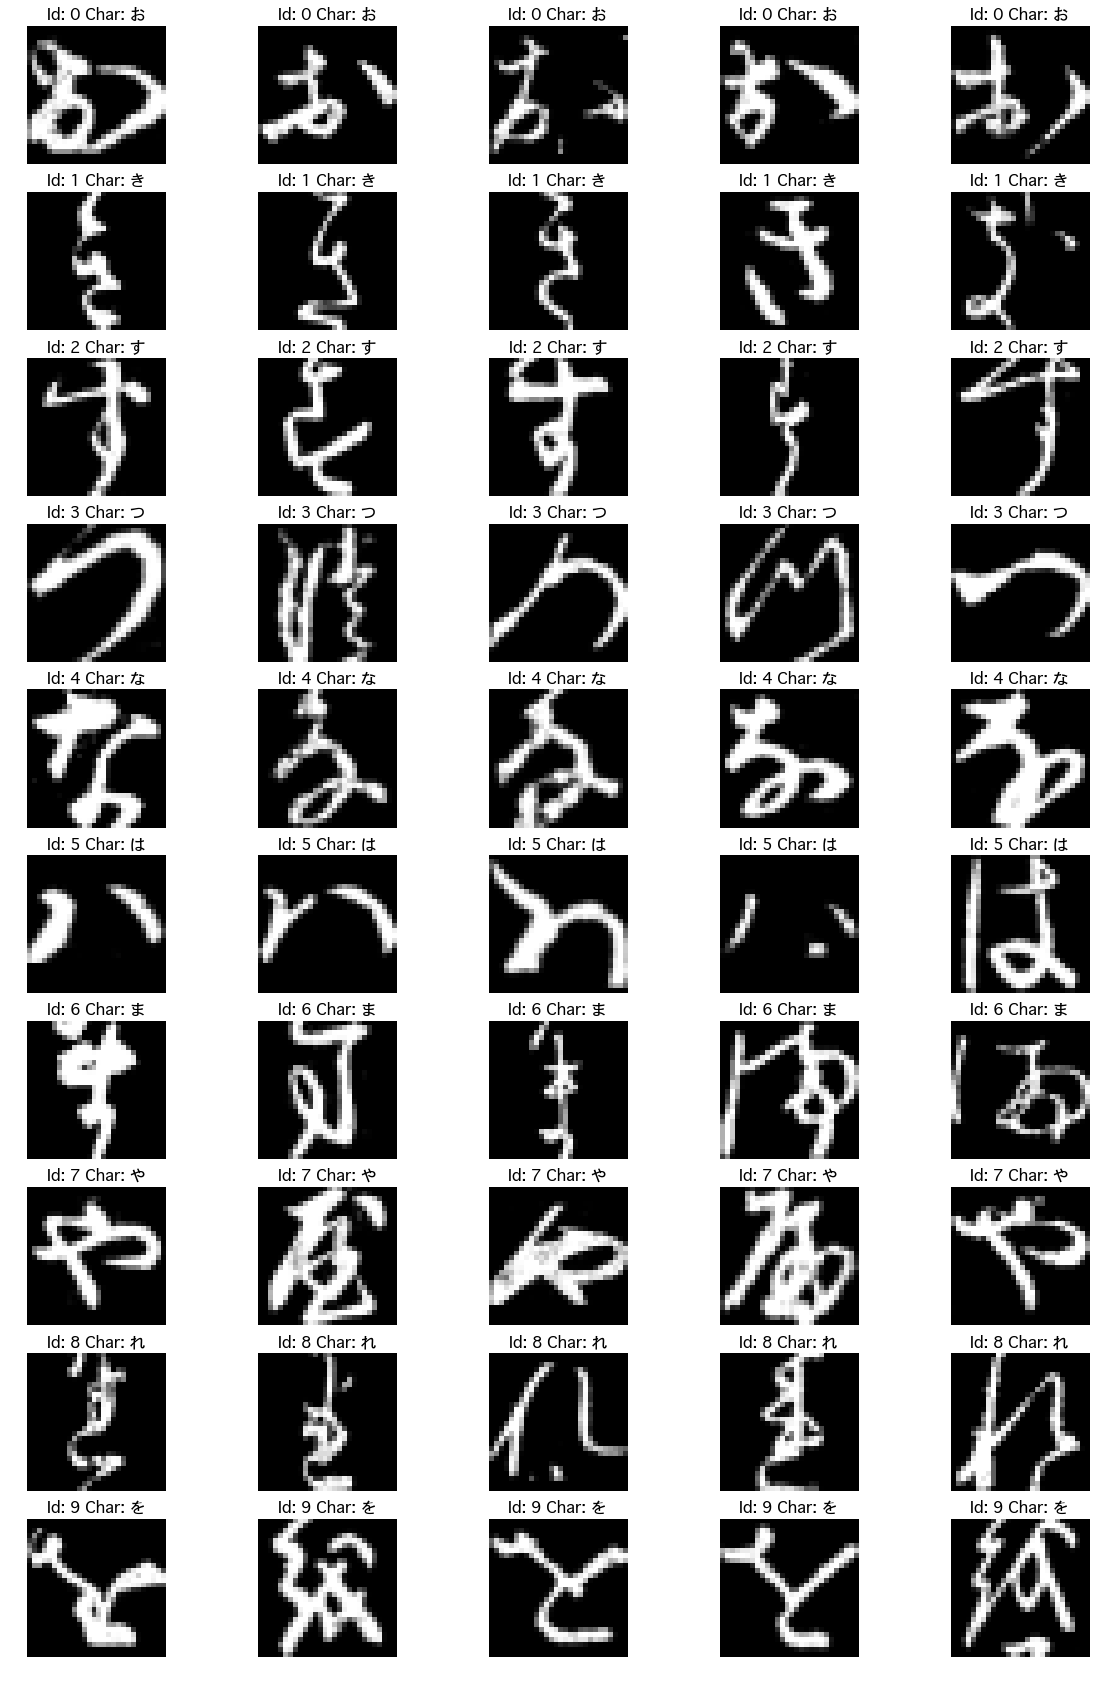

In [7]:
# Let's see how the images for different labels look like
random_samples = []
for i in range(10):
    samples = train_images[np.where(train_labels==i)][:5]
    random_samples.append(samples)

# Converting list into a numpy array
random_samples = np.array(random_samples)

# Visualize the samples
f, ax = plt.subplots(10,5, figsize=(20,30))
for i, j in enumerate(random_samples):
    for k in range(5):
        ax[i, k].imshow(random_samples[i][k,:,:], cmap='gray')
        ax[i, k].set_title('Id: {} Char: {}'.format(str(i), char_df['char'][i]), FontProperties=jpfont)
        ax[i, k].axis('off')
#         ax[i, k].set_aspect('equal')
plt.show()

In [8]:
# for i in range(15):
#     print("The {} char is : {} ".format(i+1, char_df['char'][train_labels[i]]))

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Osaka'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


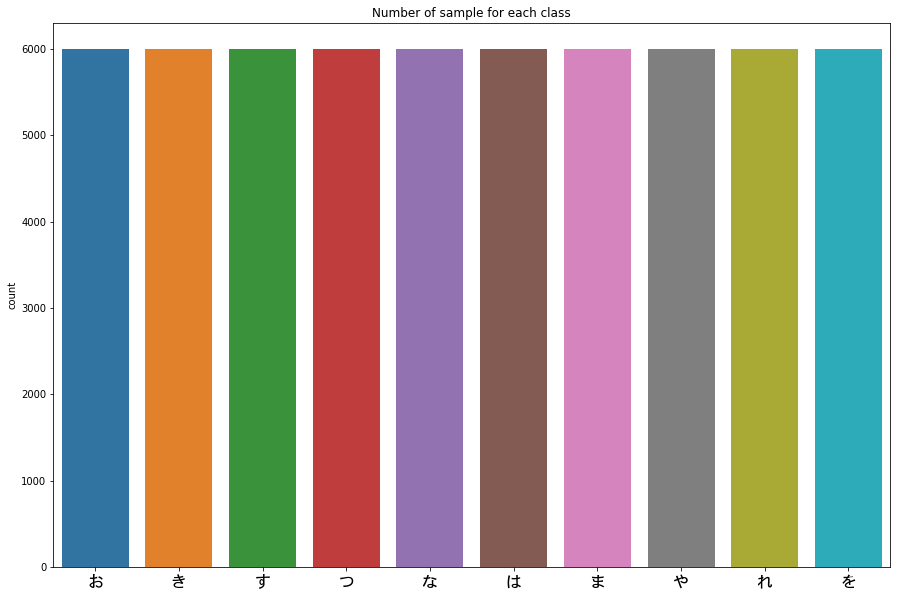

In [9]:
labels = []
for i in range(10):
    labels.append(char_df['char'][i])
f, ax = plt.subplots(1,1, figsize=(15,10))
g = sns.countplot(train_labels)
g.set_title("Number of sample for each class")
g.set_xticklabels(labels, FontProperties=jpfont)
plt.show()   

In [10]:
SEED = 42

# Sample from the training set
sample_size = 10000

np.random.seed(SEED)
idx = np.random.choice(60000, size=sample_size, replace=False)
train_sample = train_images.reshape(60000, -1)[idx, :]
label_sample = train_labels[idx]

# Generate 2D embedding with TSNE
embeddings = TSNE(verbose=2).fit_transform(train_sample)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 1.037s...
[t-SNE] Computed neighbors for 10000 samples in 220.104s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 600.543790
[t-SNE] Computed conditional probabilities in 1.053s
[t-SNE] Iteration 50: error = 96.5566254, gradient norm = 0.0005340 (50 iterations in 10.204s)
[t-SN

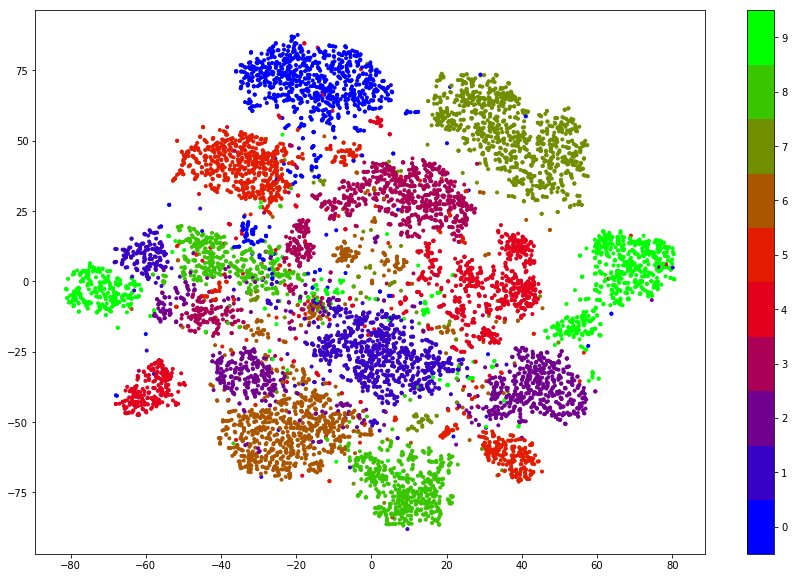

In [11]:
# Visualize TSNE embedding
vis_x = embeddings[:, 0]
vis_y = embeddings[:, 1]

plt.figure(figsize=(15,10))
plt.scatter(vis_x, vis_y, c=label_sample, cmap=plt.cm.get_cmap("brg", 10), marker='.')
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()

The classes are not easily seprable as in the case of MNIST where the boundary is quite clear

## Preprocessing the Data



In [12]:
# scaling the images
train_images = train_images / 255.0
test_images = test_images / 255.0

In [13]:
# flattening the images for train from : (60000, 28, 28) --> (60000, 784) & similarly for test
X_train_flat = train_images.reshape(60000, -1)
X_test_flat = test_images.reshape(10000,-1)

In [14]:
print(X_train_flat.shape)
print(X_test_flat.shape)

(60000, 784)
(10000, 784)


## Model Selection
Now that we have some idea about the dataset we can try diffrent models to see how they perform.

### K-NearestNeighbour

In [15]:
%%time
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=4, weights='distance', n_jobs=-1)
print('Fitting', clf)
clf.fit(X_train_flat, train_labels)
print('Test accuracy:', clf.score(X_test_flat, test_labels))

Fitting KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')
Test accuracy: 0.9159
CPU times: user 25min, sys: 796 ms, total: 25min 1s
Wall time: 6min 42s


### Support vector machine

In [16]:
%%time
from sklearn.svm import SVC

clf = SVC(C=4.1527, cache_size=200, class_weight=None, coef0=0.0,degree=3,
          gamma=0.0067,kernel='rbf', max_iter=-1, probability=False,
          random_state=SEED, shrinking=True, tol=0.001, verbose=False)
print('Fitting', clf)
clf.fit(X_train_flat, train_labels)

Fitting SVC(C=4.1527, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0067, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
CPU times: user 19min 3s, sys: 2.05 s, total: 19min 5s
Wall time: 19min 5s


In [17]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test_flat)
print('Test accuracy:', accuracy_score(y_pred, test_labels))

Test accuracy: 0.9156


### CNN with Keras

In [18]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, AvgPool2D, Reshape
from tensorflow.keras import backend as K

In [19]:
batch_size = 128
num_classes = 10
epochs = 1

# input image dimensions
img_rows, img_cols = 28, 28

In [20]:
x_train = np.expand_dims(train_images, axis=-1)
x_test = np.expand_dims(test_images, axis=-1)
y_train = keras.utils.to_categorical(train_labels)
y_test = keras.utils.to_categorical(test_labels)

In [21]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
                 input_shape=(img_rows, img_cols, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
__________

In [23]:
%%time
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
60000/60000 [==============================] - 123s 2ms/sample - loss: 0.4429 - acc: 0.8629 - val_loss: 0.3743 - val_acc: 0.8895
CPU times: user 6min 52s, sys: 43.5 s, total: 7min 36s
Wall time: 2min 3s


In [24]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.37432122370004656
Test accuracy: 0.8895


In [25]:
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['acc']
    val_acc = hist['val_acc']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = range(len(acc))
    f, ax = plt.subplots(1,2, figsize=(14,6))
    ax[0].plot(epochs, acc, 'g', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'r', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].legend()
    ax[1].plot(epochs, loss, 'g', label='Training loss')
    ax[1].plot(epochs, val_loss, 'r', label='Validation loss')
    ax[1].set_title('Training and validation loss')
    ax[1].legend()
    plt.show()

In [26]:
# plot_accuracy_and_loss(history)

In [27]:
model2 = Sequential()
model2.add(Conv2D(32,kernel_size=5,activation='relu',input_shape=(28,28,1)))
model2.add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model2.add(Dropout(0.5))
model2.add(Conv2D(64,kernel_size=5,activation='relu'))
model2.add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
model2.add(Dropout(0.5))
model2.add(Flatten())
model2.add(Dense(2048, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation='softmax'))
# model2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [28]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        25632     
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          102464    
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
__________

In [29]:
%%time
model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history2 = model2.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=35,
           verbose=1,
           validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/35
60000/60000 [==============================] - 99s 2ms/sample - loss: 0.5823 - acc: 0.8111 - val_loss: 0.3849 - val_acc: 0.8779
Epoch 2/35
60000/60000 [==============================] - 96s 2ms/sample - loss: 0.1810 - acc: 0.9450 - val_loss: 0.2442 - val_acc: 0.9290
Epoch 3/35
60000/60000 [==============================] - 96s 2ms/sample - loss: 0.1198 - acc: 0.9625 - val_loss: 0.2058 - val_acc: 0.9403
Epoch 4/35
60000/60000 [==============================] - 99s 2ms/sample - loss: 0.0932 - acc: 0.9713 - val_loss: 0.1852 - val_acc: 0.9510
Epoch 5/35
60000/60000 [==============================] - 97s 2ms/sample - loss: 0.0753 - acc: 0.9765 - val_loss: 0.1731 - val_acc: 0.9525
Epoch 6/35
60000/60000 [==============================] - 97s 2ms/sample - loss: 0.0669 - acc: 0.9793 - val_loss: 0.1409 - val_acc: 0.9619
Epoch 7/35
60000/60000 [==============================] - 99s 2ms/sample - loss: 0.0586 - acc: 0.9813 - val_loss: 0.

In [30]:
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.14070562703778106
Test accuracy: 0.974


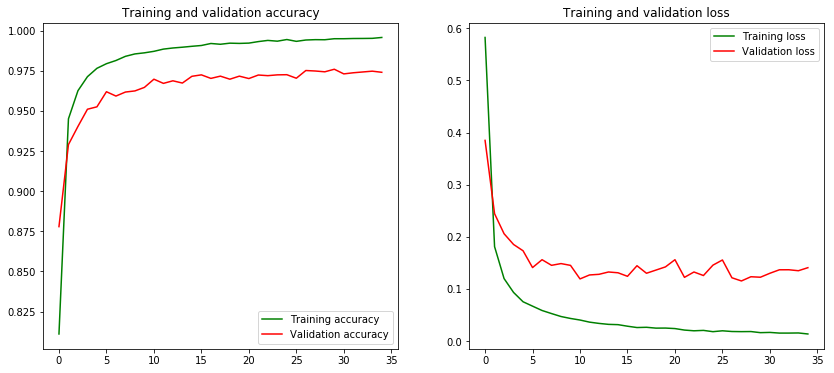

In [31]:
plot_accuracy_and_loss(history2)

In [32]:
predicted_classes = model.predict_classes(x_test)
predicted_classes.shape

(10000,)

In [33]:
predicted_classes[:10]

array([2, 2, 3, 1, 3, 3, 8, 3, 2, 5])

In [34]:
y_true = np.argmax(y_test,axis=1)
y_true.shape

(10000,)

In [35]:
y_true[:10]

array([2, 9, 3, 8, 3, 3, 8, 3, 2, 5])

In [36]:
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]


In [37]:
print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 8895
Incorrect predicted classes: 1105


In [38]:
from sklearn.metrics import classification_report

In [39]:
target_names = ["Class {} ({}):".format(i, char_df[char_df['index']==i]['char'].item()) for i in range(10)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

Class 0 (お):       0.93      0.90      0.92      1000
Class 1 (き):       0.94      0.84      0.89      1000
Class 2 (す):       0.84      0.85      0.84      1000
Class 3 (つ):       0.87      0.96      0.91      1000
Class 4 (な):       0.84      0.88      0.86      1000
Class 5 (は):       0.94      0.85      0.89      1000
Class 6 (ま):       0.81      0.93      0.86      1000
Class 7 (や):       0.91      0.92      0.92      1000
Class 8 (れ):       0.90      0.90      0.90      1000
Class 9 (を):       0.96      0.87      0.91      1000

   micro avg       0.89      0.89      0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



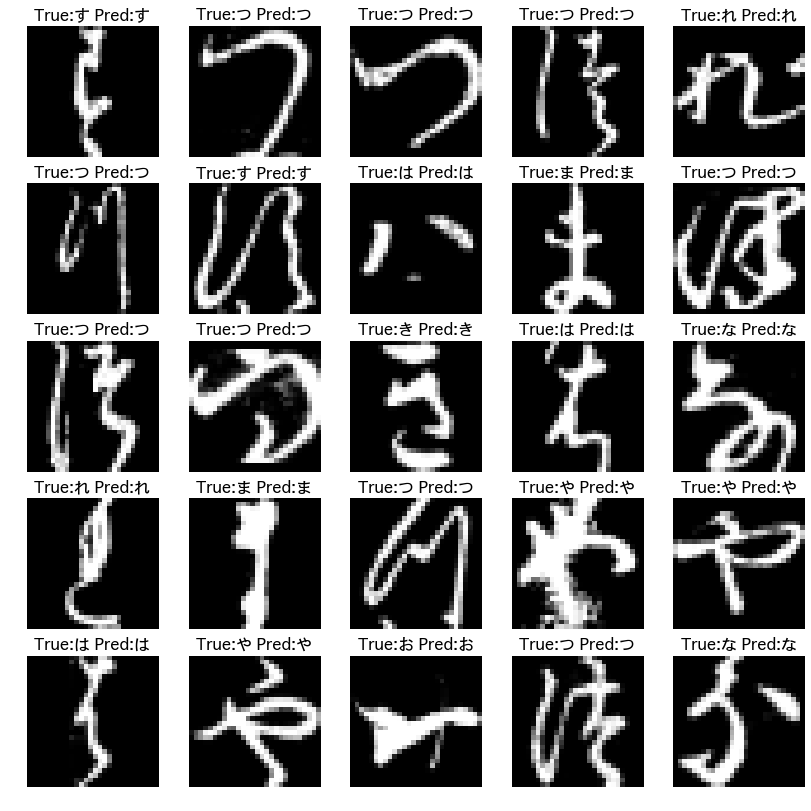

In [40]:
def plot_images(data_index,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(5,5, figsize=(14,14))

    for i, indx in enumerate(data_index[:25]):
        ax[i//5, i%5].imshow(x_test[indx].reshape(28,28), cmap=cmap)
        ax[i//5, i%5].axis('off')
#         ax[i//5, i%5].set_title("True:{}  Pred:{}".format(y_true[indx],predicted_classes[indx])))
        ax[i//5, i%5].set_title('True:{} Pred:{}'.format(char_df['char'][y_true[indx]],\
                                                         char_df['char'][predicted_classes[indx]]), FontProperties=jpfont)
    plt.show()    

plot_images(correct, "gray")

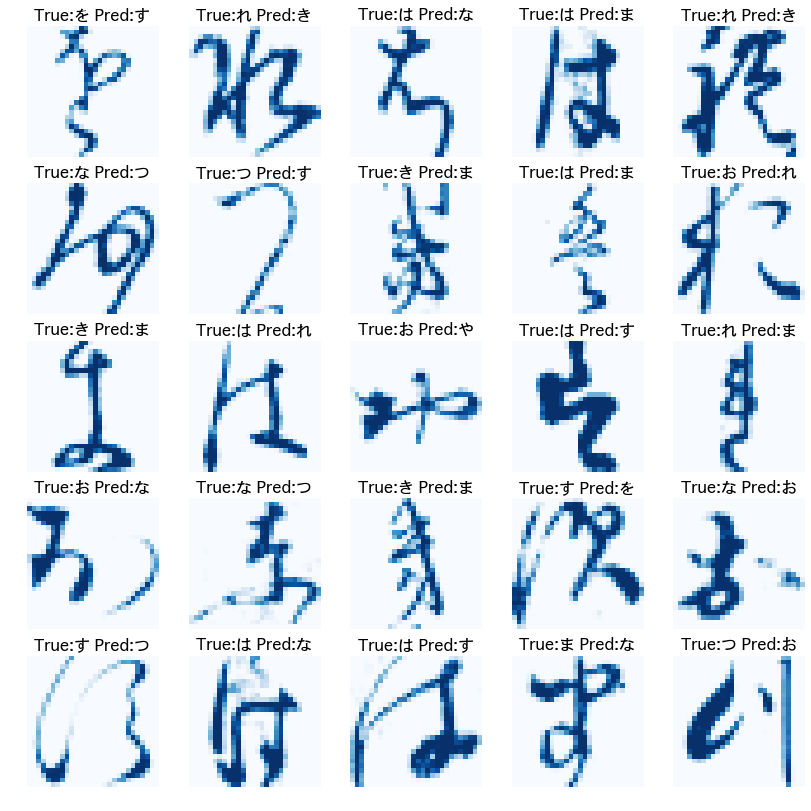

In [41]:
plot_images(incorrect)